# Majority Judgement (MJ) with concatenation of multiple votes

The majority judgment voting system is described on wikipedia: <https://en.wikipedia.org/wiki/Majority_judgment>

I like the French version: <https://fr.wikipedia.org/wiki/Jugement_majoritaire>

This notebook shows two things:
* how to read CSV files containing MJ voting results (the MJ-based ranking is automatically made at the reading step)
* how to concatenate several MJ votes into one single ranking. The different votes can be weighted with integer values.

**I do not know if the second step (concatenation of several votes) is in line with MJ theory, but it is a practical way I found to get one ranking from different votes, e.g. based on multiple criteria, and it is the real added value of these tools.**


In my module the mentions are based on the French language. There are 7 mentions but less can be used. The list is (meaning in French / English):
1. Exc (Excellent / Excellent)
2. TB (Tres Bien / Very Good)
3. B (Bien / Good)
4. AB (Assez Bien / Quite Good)
5. Pass (Passable / Acceptable)
6. Ins (Insuffisant / Insufficient)
7. AR (A Rejeter / To Reject)

The standard form for the CSV files is:

```
Id,Exc,TB,B,AB,Pass,Ins,AR
Cecile,0,10,6,1,0,1,0
Chris,2,8,1,2,4,1,0
Sylvain,4,9,3,1,1,0,0
Anne,8,7,2,1,0,0,0
Louise,12,1,0,0,0,1,4
Olivier,0,0,3,9,4,1,1
Florence,0,0,4,6,4,3,1
Manu,0,0,0,0,0,1,17
```
The 'Id' column is for "Identity" of the candidates. The other columns are the mentions.
The module will automatically add two columns 'Mmaj' (Majority Mention, computed) and 'cla' (for the French "classement": rank), compute these items and fill the columns.

A few remarks:
* Column order is unimportant. They are re-sorted at the instance creation.
* Column titles are a little bit flexible: "excellent", "passable", etc will be changed to "Exc", "Pass", etc at the instance creation.
* Blanks are removed at reading step.
* The default separation mark is comma "," but it can be specified differently.
* Columns 'Mmaj' and 'cla' can already exist in the file, they are recomputed.
* Votes can be entered in numbers or in percents. In the later case, it must be specified and the number of voters must be provided.
* The identifier "Id" is the first column (0 in python) by default. If not, it must be specified in the ```index_col``` argument.

Examples are given below: 3 vote files are read and votes are concatenated.

## Import module

In [14]:
import MajorityJudgement as mj
%reload_ext autoreload
%autoreload 2

## Read file 1

The first vote involves 8 candidates and 18 voters. The results are formatted in a CSV file as:

```
Id,Exc,TB,B,AB,Pass,Ins,AR
Cecile,0,10,6,1,0,1,0
Chris,2,8,1,2,4,1,0
Sylvain,4,9,3,1,1,0,0
Anne,8,7,2,1,0,0,0
Louise,12,1,0,0,0,1,4
Olivier,0,0,3,9,4,1,1
Florence,0,0,4,6,4,3,1
Manu,0,0,0,0,0,1,17
```

This format meets the default arguments:

* Candidates are in the first column (index 0)
* Votes are separated with commas
* 7 mentions are used
* Votes are expressed in numbers, not in percent

The number of voters is computed from the data if not specified. By default, results are displayed (table and bar plot).

Entries are in numbers (default).
The number of voters is reset to  18
Compute majority mentions and rank candidates
Vote:  results-vote-1.csv
There are 8 candidates and 18 voters.


,Exc,TB,B,AB,Pass,Ins,AR,Mmaj,cla
Id,,,,,,,,,
Louise,12,1,0,0,0,1,4,Exc,1
Anne,8,7,2,1,0,0,0,TB,2
Sylvain,4,9,3,1,1,0,0,TB,3
Cecile,0,10,6,1,0,1,0,TB,4
Chris,2,8,1,2,4,1,0,TB,5
Olivier,0,0,3,9,4,1,1,AB,6
Florence,0,0,4,6,4,3,1,AB,7
Manu,0,0,0,0,0,1,17,AR,8


                               --------------------------------------
Vote:  results-vote-1.csv


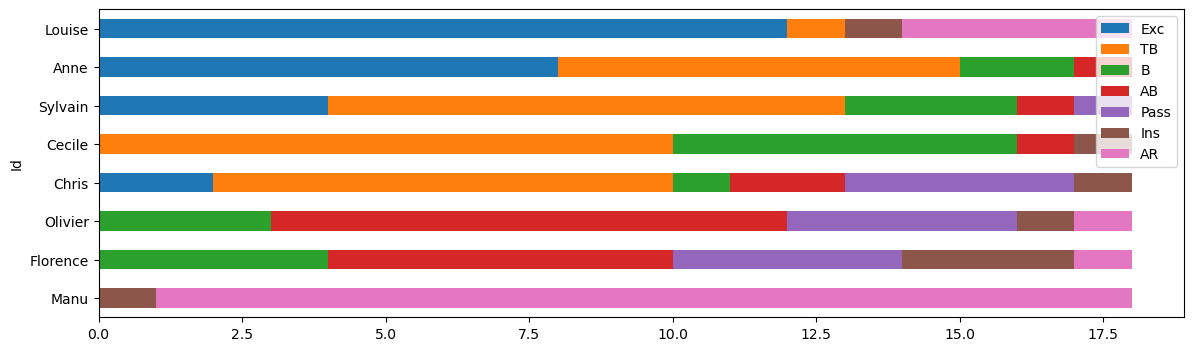

          -------------------------------------------------------------------------


In [20]:
csvfile1 = 'results-vote-1.csv'
res1 = mj.Vote(csvfile1)

## Read file 2

The second vote involves 6 candidates (a subset of Vote 1) and 16 voters. The results are formatted in a CSV file as:

```
cla;Id;Exc;TB;B;AB;Pass;Ins;AR;Mmaj
5;Cecile;62.5;25.0;12.5;0.0;0.0;0.0;0.0;TB
2;Sylvain;37.5;37.5;25;0;0;0;0;AR
1;Anne;31.5;43.75;18.75;6.3;0;0;0;Pass
4;Chris;6.3;25.0;37.5;25.0;0.0;6.3;0.0;AB
6;Louise;18.8;18.8;18.8;12.5;18.8;6.3;6.3;Exc
3;Olivier;0.0;12.5;25.0;37.5;6.3;12.5;6.3;Ins
```

This format does not meet the default arguments:

* Candidates are in the second column (index 1)
* Votes are separated with semicolumns
* 'cla' and 'Mmaj' columns already exist (but contain inaccurate values)
* Votes are expressed in percents, not in numbers

The number of voters must be specified because the votes are given in percents.

Entries are in percents.
Compute majority mentions and rank candidates
Vote:  results-vote-2.csv
There are 6 candidates and 16 voters.


,Exc,TB,B,AB,Pass,Ins,AR,Mmaj,cla
Id,,,,,,,,,
Cecile,10,4,2,0,0,0,0,Exc,1
Sylvain,6,6,4,0,0,0,0,TB,2
Anne,5,7,3,1,0,0,0,TB,3
Chris,1,4,6,4,0,1,0,B,4
Louise,3,3,3,2,3,1,1,B,5
Olivier,0,2,4,6,1,2,1,AB,6


                               --------------------------------------
Vote:  results-vote-2.csv


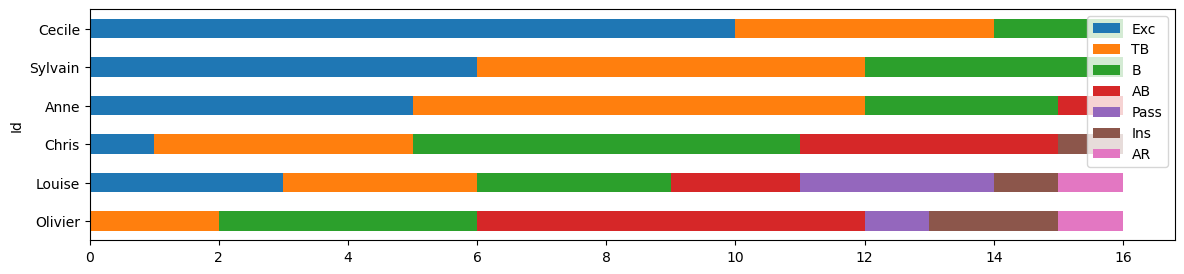

          -------------------------------------------------------------------------


In [18]:
csvfile2 = 'results-vote-2.csv'
res2 = mj.Vote(csvfile2, entry_type="percents", Nvoters=16, index_col=1, sep=";")

## Read file 3

The third vote involves 5 candidates (a subset of Vote 2) and 16 voters. The results are formatted in a CSV file as:

```
Id;Exc;TB;B;AB;Pass;Ins;AR;Mmaj;cla
Cecile;37.5;43.8;6.3;12.5;0.0;0.0;0.0;;1
Sylvain;6.3;31.3;31.3;18.8;6.3;6.3;0.0;;3
Chris;0.0;12.5;18.8;50.0;6.3;6.3;6.3;;8
Anne;0.0;12.5;12.5;43.8;18.8;12.5;0.0;;9
Louise;6.3;12.5;6.3;12.5;31.3;12.5;18.8;;12
```

This format, not very different from Vote 2, does not meet the default arguments:

* Votes are separated with semicolumns
* 'cla' and 'Mmaj' columns already exist (but contain inaccurate values)
* Votes are expressed in percents, not in numbers

The number of voters must be specified because the votes are given in percents.

Entries are in percents.
Compute majority mentions and rank candidates
Vote:  results-vote-3.csv
There are 5 candidates and 16 voters.


,Exc,TB,B,AB,Pass,Ins,AR,Mmaj,cla
Id,,,,,,,,,
Cecile,6,7,1,2,0,0,0,TB,1
Sylvain,1,5,5,3,1,1,0,B,2
Chris,0,2,3,8,1,1,1,AB,3
Anne,0,2,2,7,3,2,0,AB,4
Louise,1,2,1,2,5,2,3,Pass,5


                               --------------------------------------
Vote:  results-vote-3.csv


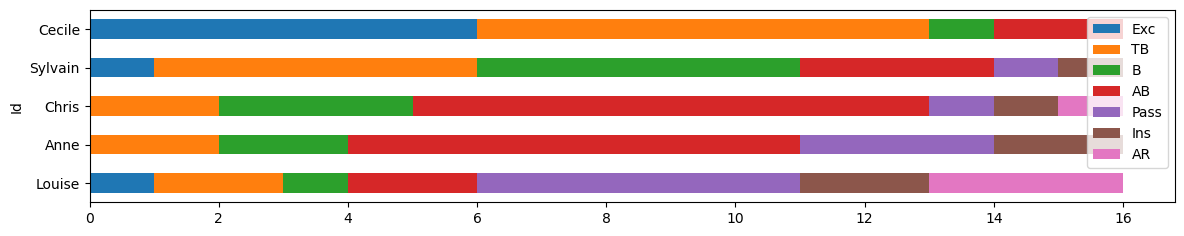

          -------------------------------------------------------------------------


In [19]:
csvfile3 = 'results-vote-3.csv'
res3 = mj.Vote(csvfile3, entry_type="percents", Nvoters=16, index_col=0, sep=";")

## Concatenate votes with weights

The votes must be put into a list, as well as the weights. The ```df_weighted_sum``` function implements the weighted concatenation of the votes, rank the candidates, and display the results.

If the number of candidates varies among the votes, the smallest number is considered. If the candidates lists are different, the process aborts.

The Vote instances contain different numbers of candidates. We restrict to the smallest number:  5
Good. The candidates from the shortest list appear in the others.
Results are now expressed in percents.
Vote:  Concatenation
There are 5 candidates and 116 voters.


,Exc,TB,B,AB,Pass,Ins,AR,Mmaj,cla
Id,,,,,,,,,
Cecile,32.8,42.2,16.4,6.9,0.0,1.7,0.0,TB,1
Sylvain,19.8,38.8,25.0,9.5,4.3,2.6,0.0,TB,2
Anne,22.4,29.3,13.8,21.6,7.8,5.2,0.0,TB,3
Chris,5.2,25.9,19.8,31.0,9.5,6.0,2.6,B,4
Louise,28.4,12.1,7.8,8.6,18.1,8.6,16.4,AB,5


                               --------------------------------------
Vote:  Concatenation


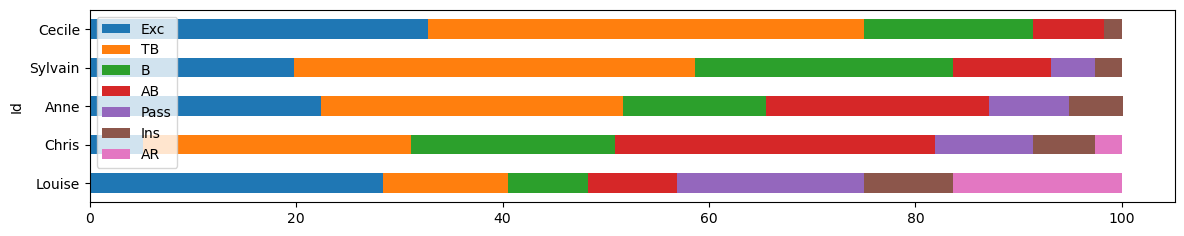

          -------------------------------------------------------------------------


In [21]:
list_of_votes = [res1, res2, res3]
weights = [2, 2, 3]
final_results = mj.df_weighted_sum(list_of_votes, weights, percents=True)

## End of notebook